In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
vesit_df = pd.read_csv('vesit.csv')
analyzer = SentimentIntensityAnalyzer()

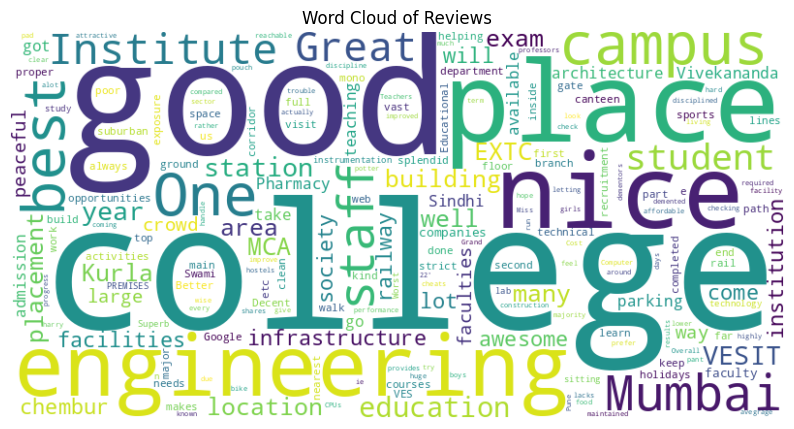

In [16]:
reviews_text = ' '.join(str(review) for review in vesit_df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()

In [27]:
scores = []
positive_list = []
negative_list = []
neutral_list = []

for review in vesit_df['review']:
    review = str(review)
    pos = analyzer.polarity_scores(review)["pos"]
    neu = analyzer.polarity_scores(review)["neu"]
    neg = analyzer.polarity_scores(review)["neg"]

    scores.append({ "Positive": pos,
                    "Negative": neg,
                    "Neutral": neu
                  })

In [28]:
sentiments_score = pd.DataFrame.from_dict(scores)
vesit_df = vesit_df.join(sentiments_score)

In [29]:
def max_of_three(a, b, c):
    max_value = max(a, b, c)
    if max_value == a:
        return "Positive"
    elif max_value == b:
        return "Negative"
    else:
        return "Neutral"

In [30]:
labels = []
for index, row in vesit_df.iterrows():
  max_val = max_of_three(row['Positive'], row['Negative'], row['Neutral'])
  labels.append(max_val)

vesit_df['label'] = labels

In [31]:
vesit_df

,review,Positive,Negative,Neutral,label
0,I've completed my BE in EXTC in 22'. Placement...,0.202,0.027,0.771,Neutral
1,Very nice place it's peaceful. It have good in...,0.496,0.000,0.504,Neutral
2,One of the best engineering colleges in Mumbai...,0.297,0.027,0.676,Neutral
3,College is also known as VESIT. it shares cam...,0.066,0.000,0.934,Neutral
4,Very nice place it's peaceful. It have good in...,0.496,0.000,0.504,Neutral
...,...,...,...,...,...
93,Nice campus,0.737,0.000,0.263,Positive
94,What can be done less than one?,0.000,0.000,1.000,Neutral
95,Swami Vivekananda College Chembur is a very go...,0.262,0.000,0.738,Neutral
96,very beautiful,0.807,0.000,0.193,Positive


In [32]:
vesit_df.drop(columns=['Positive', 'Negative', 'Neutral'], inplace=True)

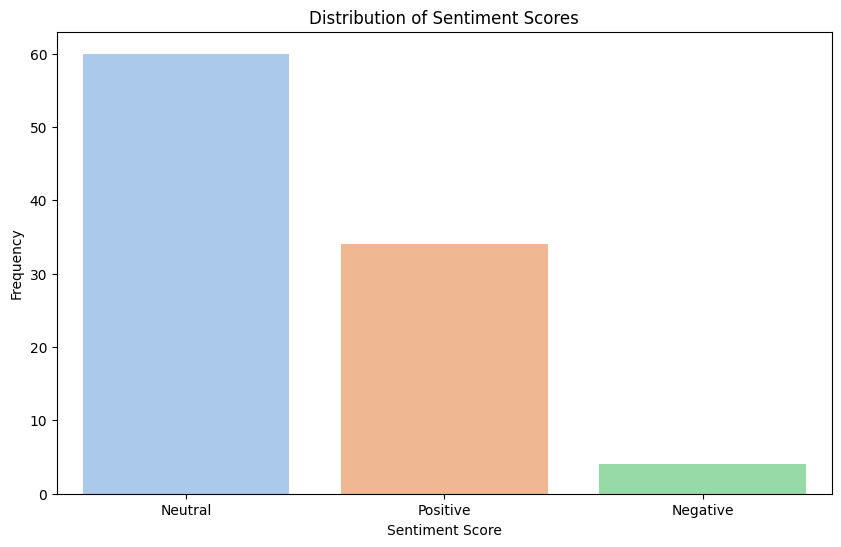

In [33]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 6))
sns.countplot(vesit_df, x='label', hue='label', palette='pastel', dodge=False)
plt.legend().set_visible(False)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [34]:
positive_reviews = ' '.join(vesit_df[vesit_df['label'] == 'Positive']['review'].values)
negative_reviews = ' '.join(vesit_df[vesit_df['label'] == 'Negative']['review'].values)
neutral_reviews = ' '.join(vesit_df[vesit_df['label'] == 'Neutral']['review'].values)

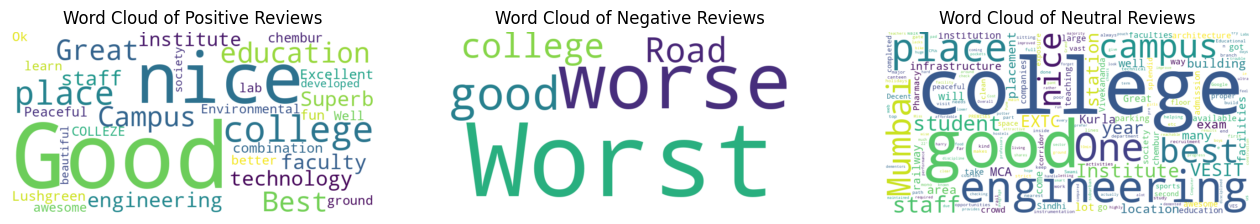

In [35]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Reviews')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Reviews')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud of Neutral Reviews')
plt.axis('off')

plt.show()